<a href="https://colab.research.google.com/github/Tama101/SHOPEE-SALES-FORECASTING/blob/main/MACS_SHOPEE_FORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. LOAD DATA**

In [1]:
from google.colab import files
import pandas as pd

# Upload the XLSX file from your local drive to Colab
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving SHOPEE - JANUARI SEPTEMBER 2023 - Copy.xlsx to SHOPEE - JANUARI SEPTEMBER 2023 - Copy.xlsx


In [3]:
# Load the XLSX file into a Pandas DataFrame
df = pd.read_excel(file_name)
pd.set_option('display.max_columns', None)  # Show all columns
df.head(20)

,No. Pesanan,Status Pesanan,Alasan Pembatalan,Status Pembatalan/ Pengembalian,No. Resi,Opsi Pengiriman,Antar ke counter/ pick-up,Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan),Waktu Pengiriman Diatur,Waktu Pesanan Dibuat,Waktu Pembayaran Dilakukan,Metode Pembayaran,SKU Induk,Nama Produk,Nomor Referensi SKU,Nama Variasi,Harga Awal,Harga Setelah Diskon,Jumlah,Total Harga Produk,Total Diskon,Diskon Dari Penjual,Diskon Dari Shopee,Berat Produk,Jumlah Produk di Pesan,Total Berat,Voucher Ditanggung Penjual,Cashback Koin,Voucher Ditanggung Shopee,Paket Diskon,Paket Diskon (Diskon dari Shopee),Paket Diskon (Diskon dari Penjual),Potongan Koin Shopee,Diskon Kartu Kredit,Ongkos Kirim Dibayar oleh Pembeli,Estimasi Potongan Biaya Pengiriman,Ongkos Kirim Pengembalian Barang,Total Pembayaran,Perkiraan Ongkos Kirim,Catatan dari Pembeli,Catatan,Username (Pembeli),Nama Penerima,No. Telepon,Alamat Pengiriman,Kota/Kabupaten,Provinsi,Waktu Pesanan Selesai,tanggal,bulan
0,2301015YDEP2AS,Selesai,NaN,NaN,10006458212761,Reguler (Cashless)-Anteraja Reguler,Pickup,2023-01-03 00:59:00,2023-01-02 15:39:00,2023-01-01 00:05:00,2023-01-01 00:59:00,SPayLater,24GELCRAY.01,MACS 24 Colors Gel Crayon Warna,24GELCRAY.01,NaN,118000,73900,1,73900,44100,44100,0,500 gr,1,500 gr,5173,0,0,N,0,0,0,0,0,9000,0,70414,9000,NaN,NaN,riris.rahmadani,RIRIS RAHMADANI,6281280091488,"Aspol Bidaracina RT 01 RW 013 No.12A, KOTA JAK...",KOTA JAKARTA TIMUR,DKI JAKARTA,2023-01-04 13:29:00,2023-01-01,2023-01-01
1,2301015YMA00ES,Selesai,NaN,NaN,10006458086700,Reguler (Cashless)-Anteraja Reguler,Pickup,2023-01-03 00:09:00,2023-01-02 15:44:00,2023-01-01 00:09:00,2023-01-01 00:09:00,ShopeePay,24GELCRAY.01,MACS 24 Colors Gel Crayon Warna,24GELCRAY.01,NaN,118000,73900,1,73900,44100,44100,0,500 gr,1,500 gr,5173,0,0,N,0,0,0,0,0,9000,0,69180,9000,NaN,NaN,zeze1821,Zefaa,6289525955511,Jl. Sodang raya pasar kaget kontrakan ibu vera...,KOTA JAKARTA TIMUR,DKI JAKARTA,2023-01-04 19:18:00,2023-01-01,2023-01-01
2,23010160JUE5C6,Batal,Dibatalkan oleh Pembeli. Alasan: Perlu menguba...,NaN,NaN,Reguler (Cashless),NaN,NaT,NaT,2023-01-01 00:26:00,-,ShopeePay,24COLORPEN0.1,MACS Color Pen 24 Warna Marker Spidol,24COLORPEN0.1,NaN,89000,57556,1,57556,31444,29000,2444,500 gr,5,1068 gr,0,0,0,N,0,0,0,0,0,0,0,0,9000,NaN,NaN,bayulaksonoajii,Bayu Laksono Aji,6281298634959,"Perumahan Puri Permai 1, Blok M2 No. 2 (Rumah ...",KAB. TANGERANG,BANTEN,NaT,2023-01-01,2023-01-01
3,23010160JUE5C6,Batal,Dibatalkan oleh Pembeli. Alasan: Perlu menguba...,NaN,NaN,Reguler (Cashless),NaN,NaT,NaT,2023-01-01 00:26:00,-,ShopeePay,2BTRIANGLE.PREMIUM.03,MACS Pensil 2B Premium Segitiga 4CT,2BTRIANGLE.PREMIUM.03,NaN,14000,9900,1,9900,4100,4100,0,84 gr,5,1068 gr,0,0,0,N,0,0,0,0,0,0,0,0,9000,NaN,NaN,bayulaksonoajii,Bayu Laksono Aji,6281298634959,"Perumahan Puri Permai 1, Blok M2 No. 2 (Rumah ...",KAB. TANGERANG,BANTEN,NaT,2023-01-01,2023-01-01
4,23010160JUE5C6,Batal,Dibatalkan oleh Pembeli. Alasan: Perlu menguba...,NaN,NaN,Reguler (Cashless),NaN,NaT,NaT,2023-01-01 00:26:00,-,ShopeePay,2BMiko,MACS Pensil 2B Triangle Premium Miko,2BMiko,NaN,34000,10000,1,10000,24000,24000,0,200 gr,5,1068 gr,0,0,0,N,0,0,0,0,0,0,0,0,9000,NaN,NaN,bayulaksonoajii,Bayu Laksono Aji,6281298634959,"Perumahan Puri Permai 1, Blok M2 No. 2 (Rumah ...",KAB. TANGERANG,BANTEN,NaT,2023-01-01,2023-01-01
5,23010160JUE5C6,Batal,Dibatalkan oleh Pembeli. Alasan: Perlu menguba...,NaN,NaN,Reguler (Cashless),NaN,NaT,NaT,2023-01-01 00:26:00,-,ShopeePay,2B4CTViolet,MACS Pensil 2B Premium Segitiga 4CT Violet,2B4CTViolet,NaN,14500,1000,1,1000,13500,13500,0,84 gr,5,1068 gr,0,0,0,N,0,0,0,0,0,0,0,0,9000,NaN,NaN,bayulaksonoajii,Bayu Laksono Aji,6281298634959,"Perumahan Puri Permai 1, Blok M2 No. 2 (Rumah ...",KAB. TANGERANG,BANTEN,NaT,2023-01-01,2023-01-01
6,23010160JUE5C6,Batal,Dibatalkan oleh Pembeli. Alasan: Perlu menguba...,NaN,NaN,Reguler (Cashless),NaN,NaT,NaT,2023-01-01 00:26:00,-,ShopeePay,2BShelby,MACS Pensil 2B Triangle Premium Shelby,2BShelby,NaN,34000,10000,1,10000,24

# **2. DATA WRANGLING**

In [4]:
# tipe data
df.dtypes

No. Pesanan                                                             object
Status Pesanan                                                          object
Alasan Pembatalan                                                       object
Status Pembatalan/ Pengembalian                                         object
No. Resi                                                                object
Opsi Pengiriman                                                         object
Antar ke counter/ pick-up                                               object
Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)    datetime64[ns]
Waktu Pengiriman Diatur                                         datetime64[ns]
Waktu Pesanan Dibuat                                            datetime64[ns]
Waktu Pembayaran Dilakukan                                              object
Metode Pembayaran                                                       object
SKU Induk                                           

In [5]:
# missing values
df.isnull().sum()

No. Pesanan                                                         0
Status Pesanan                                                      0
Alasan Pembatalan                                               22142
Status Pembatalan/ Pengembalian                                 25203
No. Resi                                                         2856
Opsi Pengiriman                                                     0
Antar ke counter/ pick-up                                        2771
Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)     1943
Waktu Pengiriman Diatur                                          3078
Waktu Pesanan Dibuat                                                0
Waktu Pembayaran Dilakukan                                          0
Metode Pembayaran                                                   0
SKU Induk                                                           0
Nama Produk                                                         0
Nomor Referensi SKU 

In [6]:
# Membuang data yang status 'Batal'
df_selesai = df[df['Status Pesanan'] != 'Batal']

In [7]:
df_selesai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22142 entries, 0 to 25266
Data columns (total 50 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   No. Pesanan                                                   22142 non-null  object        
 1   Status Pesanan                                                22142 non-null  object        
 2   Alasan Pembatalan                                             0 non-null      object        
 3   Status Pembatalan/ Pengembalian                               64 non-null     object        
 4   No. Resi                                                      22142 non-null  object        
 5   Opsi Pengiriman                                               22142 non-null  object        
 6   Antar ke counter/ pick-up                                     22142 non-null  object        
 7   Pesa

# **3. SALES EXPLORATORY DATA ANALYSIS**

In [8]:
df_selesai.columns.tolist()

['No. Pesanan',
 'Status Pesanan',
 'Alasan Pembatalan',
 'Status Pembatalan/ Pengembalian',
 'No. Resi',
 'Opsi Pengiriman',
 'Antar ke counter/ pick-up',
 'Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)',
 'Waktu Pengiriman Diatur',
 'Waktu Pesanan Dibuat',
 'Waktu Pembayaran Dilakukan',
 'Metode Pembayaran',
 'SKU Induk',
 'Nama Produk',
 'Nomor Referensi SKU',
 'Nama Variasi',
 'Harga Awal',
 'Harga Setelah Diskon',
 'Jumlah',
 'Total Harga Produk',
 'Total Diskon',
 'Diskon Dari Penjual',
 'Diskon Dari Shopee',
 'Berat Produk',
 'Jumlah Produk di Pesan',
 'Total Berat',
 'Voucher Ditanggung Penjual',
 'Cashback Koin',
 'Voucher Ditanggung Shopee',
 'Paket Diskon',
 'Paket Diskon (Diskon dari Shopee)',
 'Paket Diskon (Diskon dari Penjual)',
 'Potongan Koin Shopee',
 'Diskon Kartu Kredit',
 'Ongkos Kirim Dibayar oleh Pembeli',
 'Estimasi Potongan Biaya Pengiriman',
 'Ongkos Kirim Pengembalian Barang',
 'Total Pembayaran',
 'Perkiraan Ongkos Kirim',
 'Catatan dari Pembe

In [9]:
# Group by 'No. Pesanan' and aggregate other columns
new_df = df_selesai.groupby('No. Pesanan').agg({'Waktu Pesanan Dibuat': 'first', 'Total Pembayaran': 'sum',}).reset_index()

# Reset the index to make the 'No. Pesanan' a regular column
new_df.reset_index(drop=True, inplace=True)

In [10]:
new_df

,No. Pesanan,Waktu Pesanan Dibuat,Total Pembayaran
0,23012475971711,2023-01-24 14:56:00,437000
1,23061278003030,2023-06-12 13:05:00,123504
2,23072615681622,2023-07-26 10:05:00,76144
3,2301015YDEP2AS,2023-01-01 00:05:00,70414
4,2301015YMA00ES,2023-01-01 00:09:00,69180
...,...,...,...
16260,231001PYM5KUPJ,2023-09-30 23:17:00,134120
16261,231001PYNT2PR0,2023-09-30 23:18:00,9900
16262,231001Q10PD4BY,2023-09-30 23:42:00,119584
16263,231001Q1HM4U06,2023-09-30 23:52:00,27967


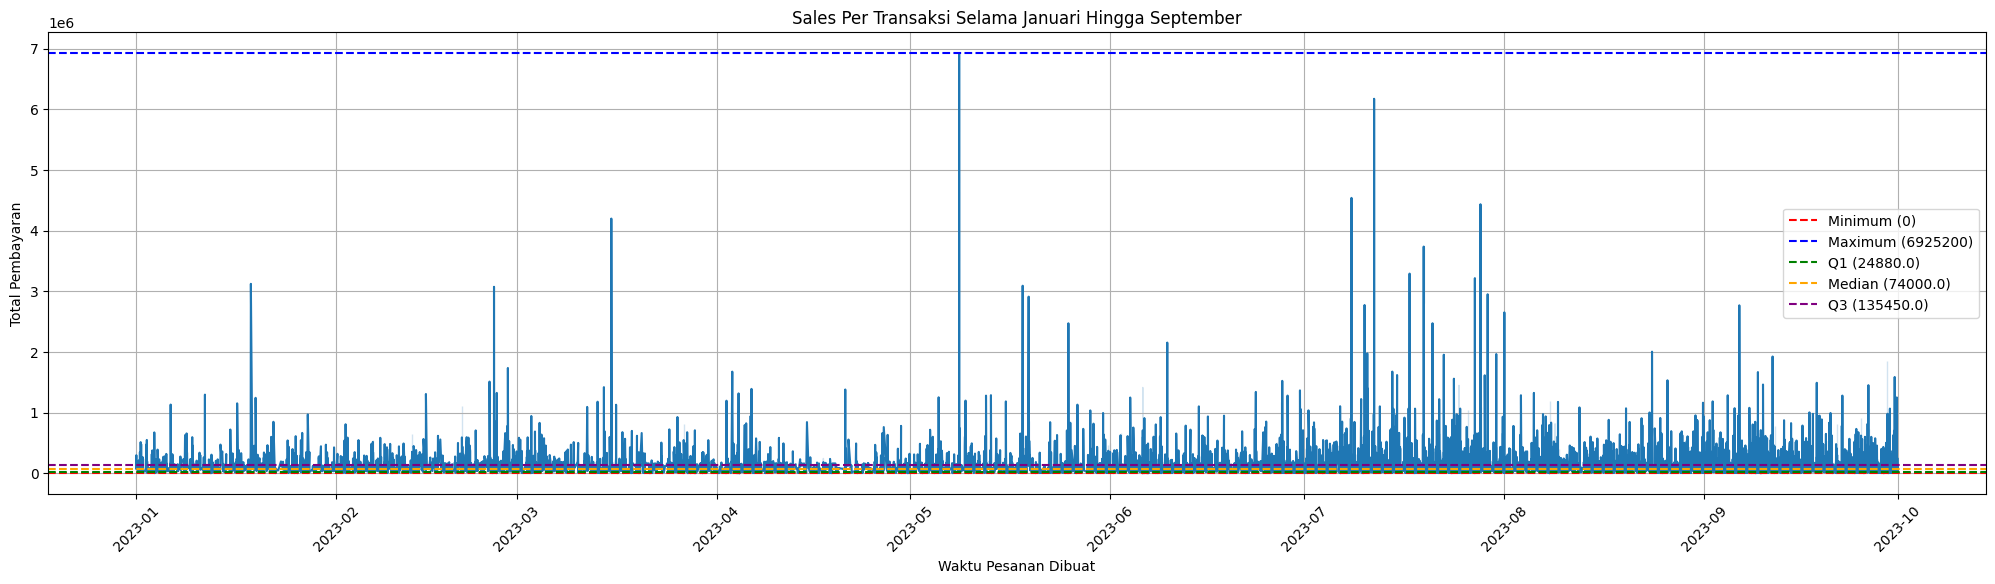

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengubah tipe data 'Waktu Pesanan Dibuat' menjadi datetime
new_df['Waktu Pesanan Dibuat'] = pd.to_datetime(new_df['Waktu Pesanan Dibuat'])

# line plot seaborn
plt.figure(figsize=(25, 6))
sns.lineplot(x='Waktu Pesanan Dibuat', y='Total Pembayaran', data=new_df)
plt.title('Sales Per Transaksi Selama Januari Hingga September')
plt.xlabel('Waktu Pesanan Dibuat')
plt.ylabel('Total Pembayaran')
plt.grid(True)
plt.xticks(rotation=45)

# Threshold nilai statistik
minimum = new_df['Total Pembayaran'].min()
maximum = new_df['Total Pembayaran'].max()
q1 = new_df['Total Pembayaran'].quantile(0.25)
median = new_df['Total Pembayaran'].median()
q3 = new_df['Total Pembayaran'].quantile(0.75)

# Set threshold lines
plt.axhline(y=minimum, color='red', linestyle='--', label=f'Minimum ({minimum})')
plt.axhline(y=maximum, color='blue', linestyle='--', label=f'Maximum ({maximum})')
plt.axhline(y=q1, color='green', linestyle='--', label=f'Q1 ({q1})')
plt.axhline(y=median, color='orange', linestyle='--', label=f'Median ({median})')
plt.axhline(y=q3, color='purple', linestyle='--', label=f'Q3 ({q3})')

plt.legend()
plt.show()

In [12]:
new_df.dtypes

No. Pesanan                     object
Waktu Pesanan Dibuat    datetime64[ns]
Total Pembayaran                 int64
dtype: object

In [13]:
new_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Total Pembayaran,16265.0,113308.78,200744.43,0.0,24880.0,74000.0,135450.0,6925200.0


Count:   
Jumlah data transaksi yang tercatat dalam dataset ini adalah sebanyak 16.265 transaksi.

Mean:   
Nilai rata-rata atau rata-rata aritmetika Total Pembayaran sekitar 113,308.78. Ini adalah jumlah total pembayaran dibagi oleh jumlah transaksi.

std:   
Standar deviasi, sekitar 200,744.43, mengukur sebaran atau dispersi data pembayaran terhadap nilai rata-rata. Standar deviasi yang lebih besar menunjukkan variasi yang lebih besar dalam pembayaran.

Min:   
Nilai minimum, 0.00, mewakili jumlah pembayaran terkecil dalam dataset. Ini menunjukkan bahwa ada transaksi dengan pembayaran nol.

Max:   
Nilai maksimum, 6.925.200, mewakili jumlah pembayaran terbesar dalam dataset. Ini menunjukkan bahwa ada transaksi dengan jumlah pembayaran yang sangat tinggi.

Statistik ini memberikan gambaran tentang jumlah pembayaran untuk produk Macs yang dijual di Shopee, termasuk tendensi pusat (rata-rata dan median), sebaran (standar deviasi), dan informasi tentang distribusi pembayaran dalam persentil yang berbeda. Keberadaan pembayaran nol menunjukkan bahwa mungkin ada transaksi gratis atau promosi untuk produk ini. Adanya rentang pembayaran yang luas, mulai dari minimum 0 hingga maksimum 6.925.200, menyoroti keragaman nilai transaksi dalam dataset ini.

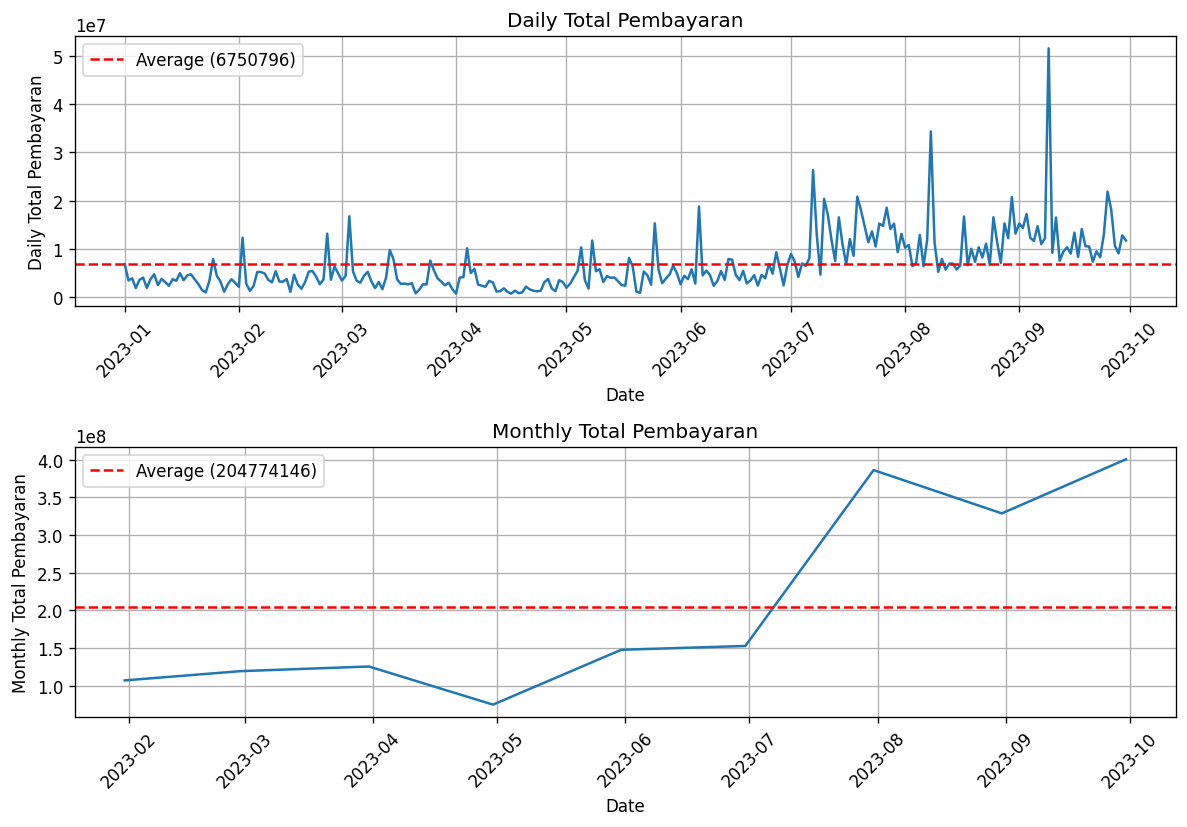

In [37]:
# Group by 'No. Pesanan' and aggregate other columns
new_df = df_selesai.groupby('No. Pesanan').agg({'Waktu Pesanan Dibuat': 'first', 'Total Pembayaran': 'sum'}).reset_index()
new_df.reset_index(drop=True, inplace=True)

# Convert 'Waktu Pesanan Dibuat' to datetime and set it as the index
new_df['Waktu Pesanan Dibuat'] = pd.to_datetime(new_df['Waktu Pesanan Dibuat'])
new_df.set_index('Waktu Pesanan Dibuat', inplace=True)

# Resample the data to get daily and monthly sums
daily_sum = new_df['Total Pembayaran'].resample('D').sum()
monthly_sum = new_df['Total Pembayaran'].resample('M').sum()

# Calculate statistics
daily_stats = daily_sum.describe()
monthly_stats = monthly_sum.describe()

# Create subplots for daily and monthly line plots
fig, axes = plt.subplots(2, 1, figsize=(10, 7))

# Daily Line Plot
sns.lineplot(x=daily_sum.index, y=daily_sum, ax=axes[0])
axes[0].set_title('Daily Total Pembayaran')
axes[0].set_ylabel('Daily Total Pembayaran')

# Monthly Line Plot
sns.lineplot(x=monthly_sum.index, y=monthly_sum, ax=axes[1])
axes[1].set_title('Monthly Total Pembayaran')
axes[1].set_ylabel('Monthly Total Pembayaran')

# Add horizontal lines for statistics
for ax, stats in zip(axes, [daily_stats, monthly_stats]):
    mean = round(stats['mean'])
    ax.axhline(y=mean, color='r', linestyle='--', label=f'Average ({mean})')

# Customize the subplots
for ax in axes:
    ax.grid(True)
    ax.set_xlabel('Date')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [15]:
# Summary Statistic Sales Harian
pd.DataFrame(daily_sum).describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Total Pembayaran,273.0,6750796.0,5808736.0,661668.0,3023228.0,4815539.0,9288101.0,51668365.0


In [16]:
# Summary Statistic Sales Bulanan
pd.DataFrame(monthly_sum).describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Total Pembayaran,9.0,204774146.0,128743165.0,74925436.0,119355029.0,147710650.0,328781570.0,400604548.0


In [17]:
# Harian sales tertinggi
pd.DataFrame(daily_sum).reset_index().loc[pd.DataFrame(daily_sum).reset_index()['Total Pembayaran'].idxmax()]

Waktu Pesanan Dibuat    2023-09-09 00:00:00
Total Pembayaran                   51668365
Name: 251, dtype: object

In [18]:
# Harian sales terendah
pd.DataFrame(daily_sum).reset_index().loc[pd.DataFrame(daily_sum).reset_index()['Total Pembayaran'].idxmin()]

Waktu Pesanan Dibuat    2023-04-01 00:00:00
Total Pembayaran                     661668
Name: 90, dtype: object

In [19]:
# bulan sales tertinggi
pd.DataFrame(monthly_sum).reset_index().loc[pd.DataFrame(monthly_sum).reset_index()['Total Pembayaran'].idxmax()]

Waktu Pesanan Dibuat    2023-09-30 00:00:00
Total Pembayaran                  400604548
Name: 8, dtype: object

In [20]:
# bulan sales terendah
pd.DataFrame(monthly_sum).reset_index().loc[pd.DataFrame(monthly_sum).reset_index()['Total Pembayaran'].idxmin()]

Waktu Pesanan Dibuat    2023-04-30 00:00:00
Total Pembayaran                   74925436
Name: 3, dtype: object

# **4. ARIMA model**

## ADFULLER test

In [21]:
# sales harian
sales_harian = pd.DataFrame(daily_sum).reset_index()

In [22]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(sales_harian['Total Pembayaran'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.394546
p-value: 0.584888


Dalam hasil test ADF ini:

**ADF Statistic: -1.394546**

Nilai ini adalah hasil dari perhitungan statistik ADF. Statistik ini digunakan untuk menentukan apakah deret waktu tersebut stasioner atau tidak. Dalam kasus ini, nilai -1.394546 adalah nilai statistik ADF.

**p-value: 0.584888**  
Nilai ini adalah p-value yang dihasilkan dari test ADF. P-value adalah ukuran seberapa kuatnya bukti yang mendukung hipotesis nol (hipotesis bahwa deret waktu tidak stasioner). Dalam hal ini, p-value adalah 0.584888.

**Kesimpulan dari hasil ini:**  
Jika p-value kurang dari tingkat signifikansi yang telah ditetapkan sebelumnya (0.05), maka kita dapat menolak hipotesis nol dan menyimpulkan bahwa deret waktu adalah stasioner.
Berdasarkan hasil test diatas, nilai p-value lebih besar dari 0.05, yaitu 0.58 yang berarti data ini tidak stationer.

## DIFFERENCING METHOD

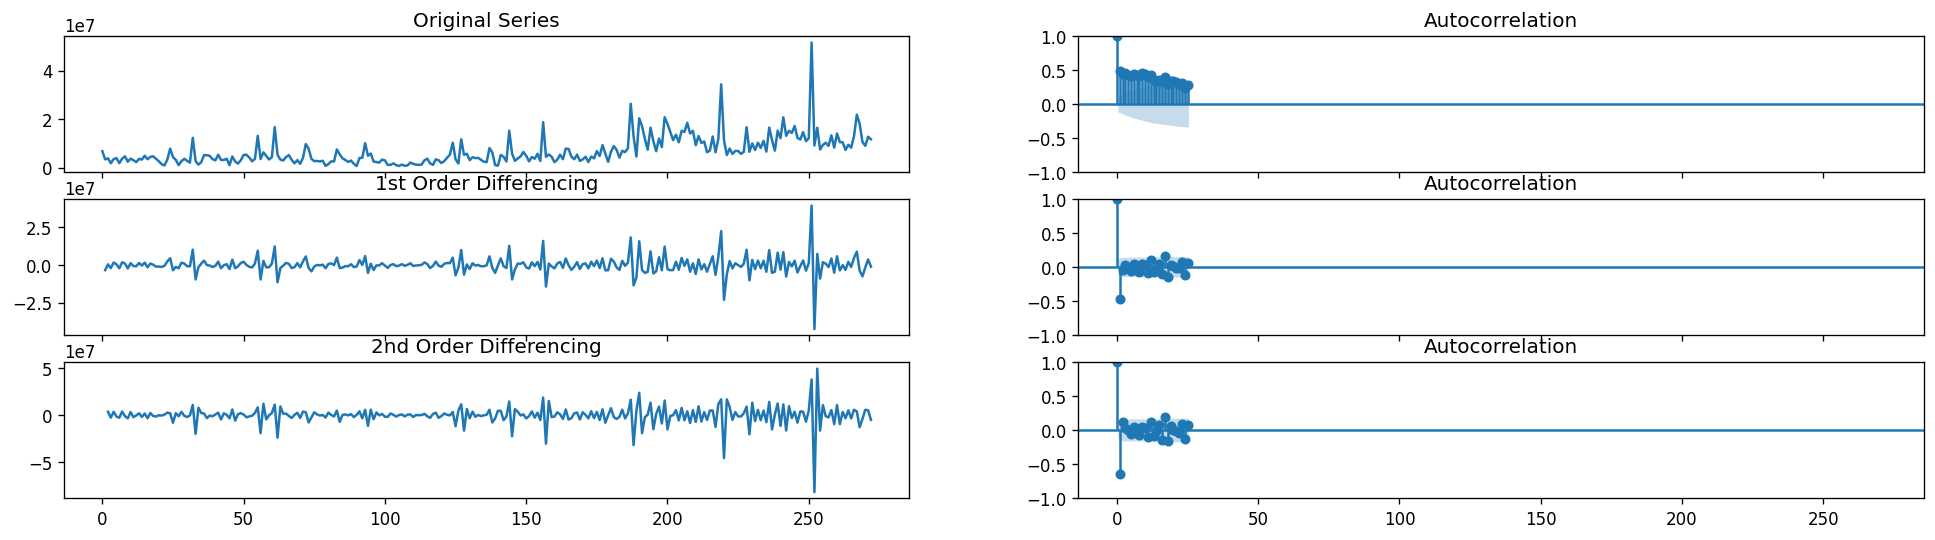

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(20,5), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(sales_harian['Total Pembayaran']); axes[0, 0].set_title('Original Series')
plot_acf(sales_harian['Total Pembayaran'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sales_harian['Total Pembayaran'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sales_harian['Total Pembayaran'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sales_harian['Total Pembayaran'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sales_harian['Total Pembayaran'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Berdasarkan hasil uji diatas, time series yang stationer dihasilkan pada uji pertama differencing.

## IDENTIFIKASI AUTOREGRESSIVE (AR)

Langkah berikutnya adalah menentukan apakah model yang kita buat memerlukan AR (AutoRegressive). Kita akan menentukan jumlah AR yang diperlukan dengan mengamati plot Partial Autocorrelation (PACF).

Kita dapat mengartikan partial autocorrelation sebagai tingkat korelasi antara seri waktu dan lag-lagnya, setelah menghapus pengaruh dari lag-lag perantara. Secara sederhana, PACF mencerminkan korelasi murni antara suatu lag dan seri waktu. Ini membantu kita menentukan apakah lag tersebut dibutuhkan dalam konteks AR atau tidak.

PACF dari lag (k) dalam suatu deret waktu adalah koefisien dari lag tersebut dalam persamaan autoregresi dari Y.

```Yt = α0 + α1Yt-1 + α2Yt-2 + α3Yt-3```

Dengan kata lain, jika Y_t adalah deret waktu saat ini dan Y_t-1 adalah lag 1 dari Y, maka PACF dari lag 3 (Y_t-3) adalah koefisien α3 dari Y_t-3 dalam persamaan di atas.

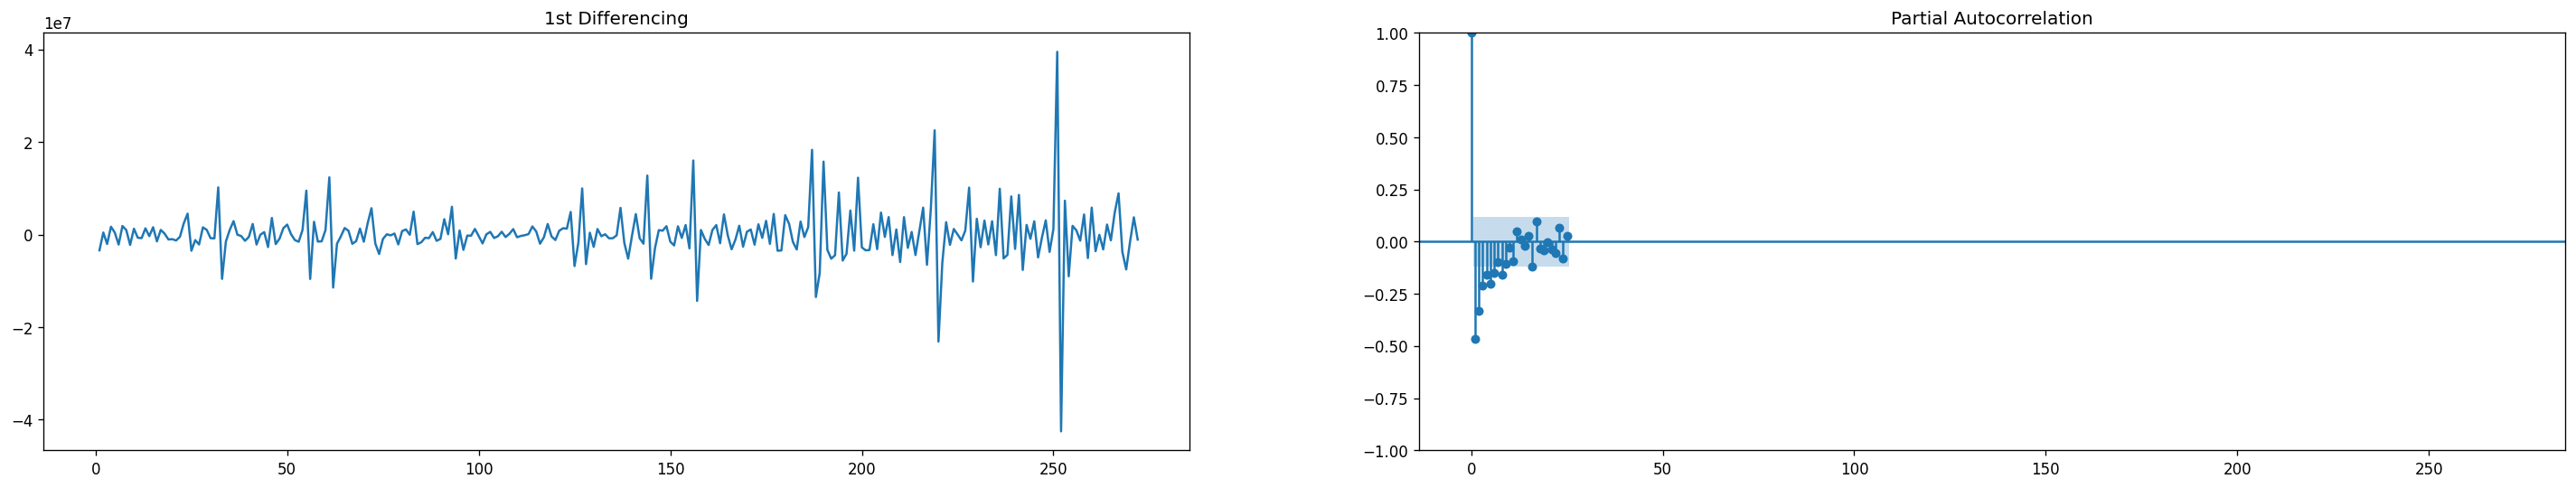

In [24]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(30,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sales_harian['Total Pembayaran'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(sales_harian['Total Pembayaran'].diff().dropna(), ax=axes[1])

plt.show()

Dari hasil observasi, kita dapat melihat bahwa PACF pada lag 1 cukup signifikan karena nilainya jauh di atas garis threshold. Oleh karena itu, kita akan menetapkan nilai p (jumlah istilah AR) sebesar 1. Dalam model ARIMA, nilai p mengindikasikan berapa banyak lag dari deret waktu sebelumnya yang akan dimasukkan ke dalam model autoregresi. Dalam kasus ini, kita memilih untuk hanya memasukkan lag 1 dalam model ARIMA.

## MOVING AVERAGE (MA)

Kita juga menggunakan plot Autocorrelation Function (ACF) untuk menentukan jumlah Moving Average (MA) yang diperlukan dalam model. MA pada dasarnya adalah kesalahan dalam prediksi dari lag yang telah dihitung sebelumnya.

Plot ACF memberi tahu kita berapa banyak MA yang harus digunakan untuk menghilangkan autocorrelation dalam deret waktu yang sudah stationer. Dengan melihat plot ACF, kita dapat memahami berapa banyak lag dari data sebelumnya yang perlu dimasukkan dalam model Moving Average.

Jadi, kita menggunakan plot ACF untuk menentukan jumlah MA yang diperlukan dalam model ARIMA.

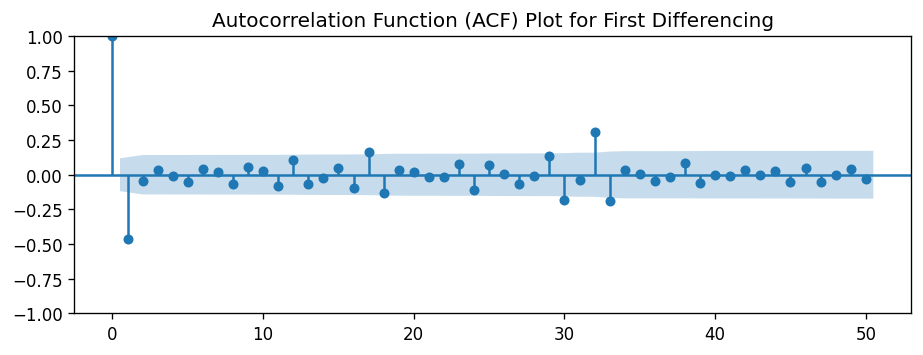

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# ACF plot for the first differencing
plot_acf(sales_harian['Total Pembayaran'].diff().dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) Plot for First Differencing')
plt.show()

Kita akan menggunakan nilai q = 2, yang berarti kita akan memasukkan dua lag dari kesalahan prediksi dalam model Moving Average.

## MEMBANGUN ARIMA MODEL

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(sales_harian['Total Pembayaran'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:       Total Pembayaran   No. Observations:                  273
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4552.983
Date:                Mon, 16 Oct 2023   AIC                           9113.967
Time:                        08:02:28   BIC                           9128.390
Sample:                             0   HQIC                          9119.757
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3573      0.978     -0.365      0.715      -2.274       1.560
ma.L1         -0.4822      0.964     -0.500      0.617      -2.372       1.408
ma.L2         -0.3526      0.850     -0.415      0.6

Koefisien MA2 mendekati nol dan P-Value dalam kolom 'P>|z|' sangat tidak signifikan. Idealnya, P-Value harus kurang dari 0.05 untuk istilah X yang bersangkutan agar dianggap signifikan.

Oleh karena itu, kita akan membangun kembali model tanpa MA2 untuk menciptakan model yang lebih sederhana yang fokus pada batas yang signifikan, yang dapat meningkatkan interpretasi dan kinerja model.

In [27]:
# 1,1,1 ARIMA Model
model = ARIMA(sales_harian['Total Pembayaran'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Total Pembayaran   No. Observations:                  273
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4554.038
Date:                Mon, 16 Oct 2023   AIC                           9114.076
Time:                        08:02:29   BIC                           9124.893
Sample:                             0   HQIC                          9118.418
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0442      0.061      0.718      0.472      -0.076       0.165
ma.L1         -0.8849      0.033    -27.003      0.000      -0.949      -0.821
sigma2       2.33e+13   1.67e-15    1.4e+28      0.0

Nilai AIC pada model mengalami penurunan kecil, yang merupakan perkembangan positif. Nilai-nilai p untuk istilah AR1 dan MA1 telah membaik dan sangat signifikan (lebih kecil dari 0.05).

Sekarang, mari kita buat grafik dari sisa-sisa model untuk memastikan bahwa tidak ada pola yang muncul, dengan tujuan untuk melihat apakah rata-rata dan variansnya tetap stabil.

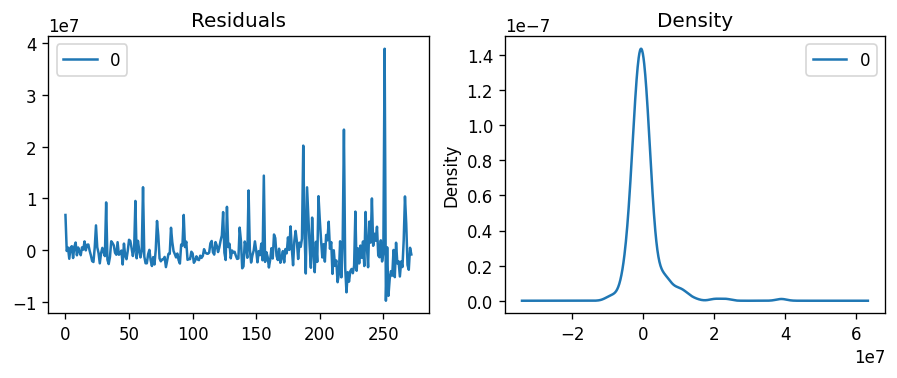

In [28]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## MODEL IMPOROVEMENT

In [29]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.1 MB/s eta 0:00:00


In [30]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(sales_harian['Total Pembayaran'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, max_d=3, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9116.359, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9254.821, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9190.136, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9114.552, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9252.825, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9118.026, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9115.942, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9112.470, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9114.076, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9112.486, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9188.152, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9113.967, Time=0.18 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.215 seconds
                               SARIMAX Results                                
Dep. Vari

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


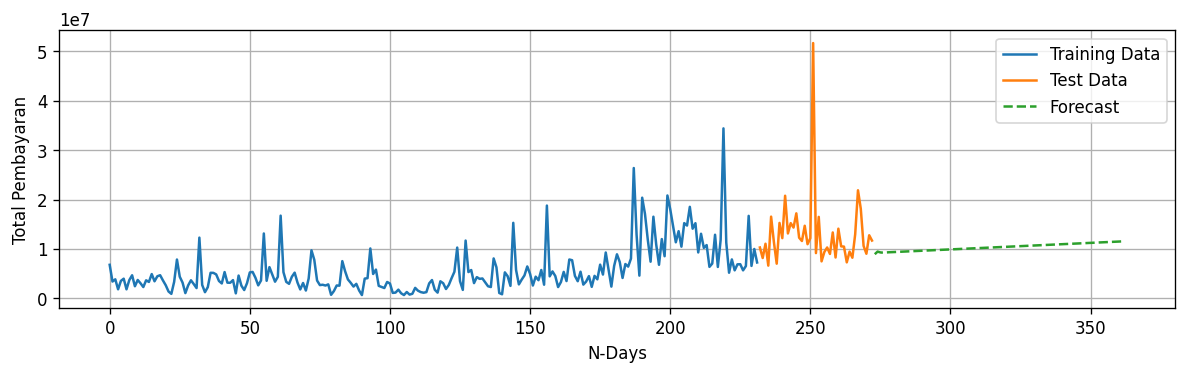

MAPE: 25.48%
MAE: 4176406.14


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your time series data
# Assuming 'sales_harian' is a DataFrame with a numeric index and a column 'Total Pembayaran'
sales_data = sales_harian['Total Pembayaran']

# Split data into training and testing sets
test_size = 0.15  # 15% test size
split_index = int(len(sales_data) * (1 - test_size))
train_data = sales_data.iloc[:split_index]
test_data = sales_data.iloc[split_index:]

# Create a numeric index for the test data
test_data.index = range(len(train_data), len(train_data) + len(test_data))

# Fit the ARIMA model with order (1, 1, 2) to training data
order = (2, 2, 2)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Make predictions for the next 31 days
forecast_steps = 90
forecast = model_fit.forecast(steps=forecast_steps, alpha=0.05)

# Create a numeric index for the forecasted values
forecast_index = range(len(train_data) + len(test_data), len(train_data) + len(test_data) + forecast_steps)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 3))
plt.plot(train_data.index, train_data, label="Training Data")
plt.plot(test_data.index, test_data, label="Test Data")
plt.plot(forecast_index, forecast, label="Forecast", linestyle='--')
plt.xlabel("N-Days")
plt.ylabel("Total Pembayaran")
plt.grid(True)
plt.legend()
plt.show()


# Calculate MAPE (Mean Absolute Percentage Error)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAE (Mean Absolute Error)
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate the actual values for the test period
actual_values = test_data.values

# Calculate MAPE and MAE for the forecasted values
mape = calculate_mape(actual_values, forecast[:len(test_data)])
mae = calculate_mae(actual_values, forecast[:len(test_data)])

print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")

In [32]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error

# Load your time series data
# Assuming 'sales_harian' is a DataFrame with a numeric index and a column 'Total Pembayaran'
sales_data = sales_harian['Total Pembayaran']

# Split data into training and testing sets
test_size = 0.16  # 15% test size
split_index = int(len(sales_data) * (1 - test_size))
train_data = sales_data.iloc[:split_index]
test_data = sales_data.iloc[split_index:]

# Use auto_arima to find the best ARIMA model
model = auto_arima(train_data, seasonal=False, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the best model to the entire training dataset
model_fit = model.fit(train_data)

# Make predictions for the test data
forecast = model_fit.predict(n_periods=len(test_data))
mae = mean_absolute_error(test_data, forecast)

print("Best ARIMA Model Summary:")
print(model_fit.summary())
print(f"Best ARIMA MAE: {mae:.2f}")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7556.734, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7655.019, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7622.972, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7559.983, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7653.040, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7555.710, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7558.287, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7559.910, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7557.864, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7557.400, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7556.835, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7551.577, Time=0.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7553.218, Time=0.38 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=7552.221, Time=0.74 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


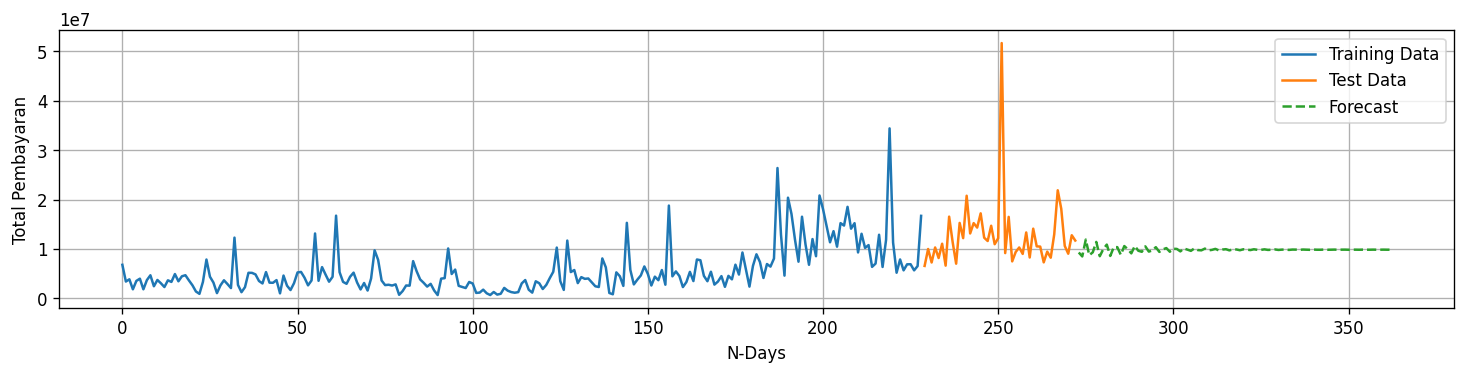

MAPE: 24.81%
MAE: 3902439.03


In [33]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

sales_data = sales_harian['Total Pembayaran']

# Split data into training and testing sets
test_size = 0.16  # 16% test size
split_index = int(len(sales_data) * (1 - test_size))
train_data = sales_data.iloc[:split_index]
test_data = sales_data.iloc[split_index:]

# Create a numeric index for the test data
test_data.index = range(len(train_data), len(train_data) + len(test_data))

# Fit the ARIMA model with order (2, 1, 3) to training data
order = (2, 1, 3)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Make forecasts for the next 90 days
forecast_steps = 90
forecast = model_fit.forecast(steps=forecast_steps, alpha=0.05)

# Create a numeric index for the forecasted values
forecast_index = range(len(train_data) + len(test_data), len(train_data) + len(test_data) + forecast_steps)

# Plot the original data and the forecasted values
plt.figure(figsize=(15, 3))
plt.plot(train_data.index, train_data, label="Training Data")
plt.plot(test_data.index, test_data, label="Test Data")
plt.plot(forecast_index, forecast, label="Forecast", linestyle='--')
plt.xlabel("N-Days")
plt.ylabel("Total Pembayaran")
plt.grid(True)
plt.legend()
plt.show()

# Calculate MAPE (Mean Absolute Percentage Error)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAE (Mean Absolute Error)
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate the actual values for the test period
actual_values = test_data.values

# Calculate MAPE and MAE for the forecasted values
mape = calculate_mape(actual_values, forecast[:len(test_data)])
mae = calculate_mae(actual_values, forecast[:len(test_data)])

print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")


In [34]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Load your time series data
# Assuming 'sales_harian' is a DataFrame with a numeric index and a column 'Total Pembayaran'
sales_data = sales_harian['Total Pembayaran']

# Split data into training and testing sets
test_size = 0.16  # 16% test size
split_index = int(len(sales_data) * (1 - test_size))
train_data = sales_data.iloc[:split_index]
test_data = sales_data.iloc[split_index:]

# Define a function to evaluate an ARIMA model with given order
def evaluate_arima(order, train_data, test_data):
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()

    # Make predictions for the test data
    forecast = model_fit.forecast(steps=len(test_data))

    # Calculate MAE for the forecasted values
    mae = mean_absolute_error(test_data, forecast)

    return mae

# Define the range of hyperparameters to search
p_values = range(0, 6)  # Range for p
d_values = range(0, 6)  # Range for d
q_values = range(0, 6)  # Range for q

best_mae = float('inf')
best_order = None

# Perform a grid search to find the best ARIMA model
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                mae = evaluate_arima(order, train_data, test_data)
                if mae < best_mae:
                    best_mae = mae
                    best_order = order
            except:
                continue

# Fit the best model to the entire training dataset
best_model = ARIMA(train_data, order=best_order)
best_model_fit = best_model.fit()
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")  # Suppress warnings
    best_model_fit = best_model.fit()  # Add disp=0 to suppress fitting warnings

# Make predictions for the test data
forecast = best_model_fit.forecast(steps=len(test_data))

# Calculate MAE for the forecasted values
mae = mean_absolute_error(test_data, forecast)

print("Best ARIMA Model Order:", best_order)
print(f"Best ARIMA MAE: {mae:.2f}")


Best ARIMA Model Order: (2, 2, 4)
Best ARIMA MAE: 3659140.83


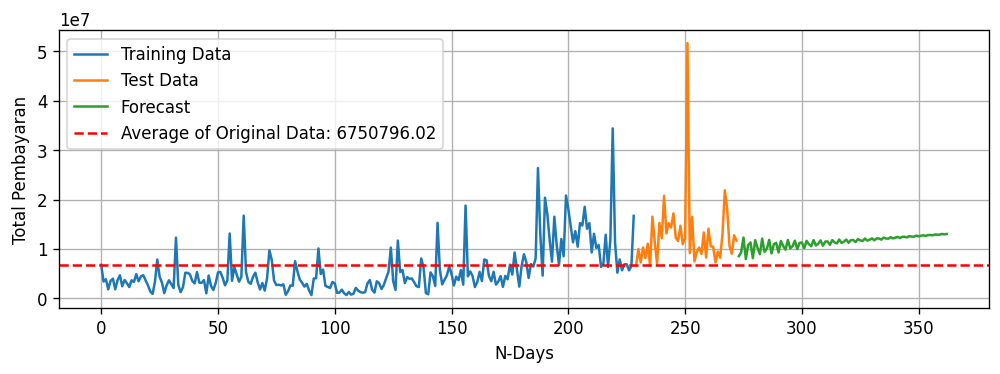

Mean Absolute Percentage Error (MAPE): 24.17%
Mean Absolute Error (MAE): 3659140.83


In [35]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

sales_data = sales_harian['Total Pembayaran']

# Split data into training and testing sets
test_size = 0.16  # 16% test size
split_index = int(len(sales_data) * (1 - test_size))
train_data = sales_data.iloc[:split_index]
test_data = sales_data.iloc[split_index:]

# Fit the ARIMA model with order (2, 2, 4) to training data
order = (2, 2, 4)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Make forecasts for the next 90 days
forecast_steps = 90
forecast = model_fit.forecast(steps=forecast_steps, alpha=0.05)

# Calculate the mean of the original dataset
mean_original = sales_data.mean()

# Create a numeric index for the forecasted values
forecast_index = range(len(train_data) + len(test_data), len(train_data) + len(test_data) + forecast_steps)

# Plot the original data and the forecasted values
plt.figure(figsize=(10, 3))
plt.plot(train_data.index, train_data, label="Training Data")
plt.plot(test_data.index, test_data, label="Test Data")
plt.plot(forecast_index, forecast, label="Forecast", linestyle='-')
plt.axhline(y=mean_original, color='red', linestyle='--', label=f'Average of Original Data: {mean_original:.2f}')  # Add the mean horizontal line
plt.xlabel("N-Days")
plt.ylabel("Total Pembayaran")
plt.grid(True)
plt.legend()
plt.show()

# Calculate MAPE (Mean Absolute Percentage Error)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAE (Mean Absolute Error)
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate the actual values for the test period
actual_values = test_data.values

# Calculate MAPE and MAE for the forecasted values
mape = calculate_mape(actual_values, forecast[:len(test_data)])
mae = calculate_mae(actual_values, forecast[:len(test_data)])

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


In [36]:
# Average prediction in 90 days
forecast.mean().round()

11499283.0

```HASIL MODEL ARIMA```

Data asli memiliki jumlah 273 observasi dengan rata-rata sekitar 6.750.796.0. yang bervariasi dengan standar deviasi sebesar 5.808.736.0. Nilai minimum data adalah 661.668.0. sedangkan nilai maksimumnya adalah 51.668.365.0. Data terdistribusi dengan kuatril 1 (25%) sebesar 3.023.228.0. median (50%) sebesar 4.815.539.0. dan kuatril 3 (75%) sebesar 9.288.101.0. Ini menggambarkan variasi yang cukup besar dalam data asli.

Model ARIMA memiliki Mean Absolute Percentage Error (MAPE) sebesar 24,17%. yang mengindikasikan bahwa model ini memprediksi data dengan kesalahan rata-rata sekitar 24,17% dari nilai sebenarnya. Mean Absolute Error (MAE) model ARIMA adalah sekitar 3.659.140.83. yang menggambarkan kesalahan mutlak rata-rata sebesar Rp 3,6 Juta.

Berdasarkan hasil prediksi model ARIMA, terhitung mulai 1 Oktober hingga 31 Desember 2023, rata - rata sales harian selama periode tersebut diperkirakan sekitar Rp 11,5 juta.